## Transporting of River Plastics in East Asia  - SNU ESE '16 Han Donghwan 

먼저 실험삼아 1년치 시뮬레이션 해보기

------------------------------------------
2016-11-21T00:00:00Z ~ 2018-11-21T00:00:00Z

5~6일 간격, 0시 기준

단위 [m/s]

depth 15m

latitude 24N ~ 45N, 0.333도 간격

longitude 116E ~ 142E, 0.333도 간격

-------------------------------------


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Data loading
import pandas as pd
import matplotlib
import numpy as np

# 전체 해류 데이터[m/s]
# NOAA
# OSCAR database - https://www.esr.org/research/oscar/oscar-surface-currents/
# 인공위성 데이터를 토대로 계산하여 만든 데이터, 계산 과정은 위의 링크 확인
entire_data = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/east_asia_sea_161121_181121.csv')

# 해안선 데이터
latc = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/eastasian_coastline_latitude.csv', header = None)
lonc = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/eastasian_coastline_longitude.csv', header = None)

# topo 데이터[m] - 위도 범위: 20~54, 경도 범위: 115~145
topo = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/eastasian_topo(20_54_115_145).csv', header = None)
latt = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/eastasian_topo_latitude(20_54).csv', header = None)
lont = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/eastasian_topo_longitude(115_145).csv', header = None)

# hsl256 칼라바 데이터
hsl256 = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/hsl256_white.csv')
hsl256_colorbar = matplotlib.colors.ListedColormap(np.array(hsl256), name='hsl256', N=None)

# 강 데이터
yellowsea_river_data = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/yellowsea_river.csv')

# 월별 river discharge index
river_discharge_data = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/river_discharge.csv')

In [3]:
river_discharge_data

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0.352766,0.363307,0.466645,0.538962,0.702613,0.785581,3.160435,2.418977,1.910996,0.500863,0.401831,0.397204


In [ ]:
entire_data

,time,depth,latitude,longitude,u,v,um,vm
0,2016-11-21T00:00:00Z,15,45.0,116.000000,NaN,NaN,NaN,NaN
1,2016-11-21T00:00:00Z,15,45.0,116.333333,NaN,NaN,NaN,NaN
2,2016-11-21T00:00:00Z,15,45.0,116.666667,NaN,NaN,NaN,NaN
3,2016-11-21T00:00:00Z,15,45.0,117.000000,NaN,NaN,NaN,NaN
4,2016-11-21T00:00:00Z,15,45.0,117.333333,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
733115,2018-11-21T00:00:00Z,15,24.0,140.666667,0.153165,0.082384,0.153165,0.082384
733116,2018-11-21T00:00:00Z,15,24.0,141.000000,0.152644,0.045483,0.152644,0.045483
733117,2018-11-21T00:00:00Z,15,24.0,141.333333,0.121336,0.083390,0.121336,0.083390
733118,2018-11-21T00:00:00Z,15,24.0,141.666667,0.111684,0.112354,0.111684,0.112354


In [ ]:
yellowsea_river_data

,country,region,river,plastic_per_year,lat,lon,direction
0,KOR,s korea,han,169000,37.40,126.25,west
1,KOR,s korea,geum,10700,35.80,126.40,west
2,KOR,s korea,yeongsan,14700,34.60,125.95,west
3,KOR,s korea,nakdong,19400,34.60,128.92,south
4,KOR,s korea,taehwa,7900,35.40,129.50,south
...,...,...,...,...,...,...,...
67,CHN,zhejiang,aojiang_Changnan,732000,27.57,120.90,east
68,CHN,zhejiang,jiaoxi,558400,26.20,120.05,southeast
69,CHN,zhejiang,aojiang_Lienjiang,317000,26.10,120.05,east
70,CHN,zhejiang,minjiang,1942600,26.05,120.05,east


In [4]:
#--------------------------------------------------------------------------------------
## 혹시라도 위도, 경도 범위, 내삽의 정도, 시간 간격을 바꾸게 된다면 이 부분 꼭 수정하기
#--------------------------------------------------------------------------------------

#################### 제한 #############################
#위도 범위: 20~54, 경도 범위: 115~145
######################################################

## 위도 범위 - 무조건 정수로 적어
min_lat = 24
max_lat = 45

## 경도 범위 - 무조건 정수로 적어
min_lon = 116
max_lon = 142

# 데이터 내의 위도의 갯수, 경도의 갯수
number_of_latitude = (max_lat - min_lat) * 3 + 1
number_of_longitude = (max_lon - min_lon) * 3 + 1
print(number_of_latitude)
print(number_of_longitude)

#--------------------------------------------------------------------------------------
# 내삽의 정도 - 현재는 10배 내삽해서 1/30 위도, 경도 간격이다.(약 3, 400m)
# 대략적으로 10배 내삽하였을 때 하루당 3초의 running time
# 100배 내삽하였을 때 하루당 300초의 running time
degree_of_interpolation = 40
d_lon_lat = 1 / 3 / degree_of_interpolation
print(d_lon_lat)
d_lon_lat_before_interpolation = 1 / 3

#--------------------------------------------------------------------------------------
# 플라스틱이 얼마만큼 분산되어 유입되는지
plastic_distribution = 0.02

#--------------------------------------------------------------------------------------
# 다른 강들을 상대비에 따라 곱할 것인데 그 기준
plastic_constant = degree_of_interpolation**2 / 4

64
79
0.008333333333333333


In [5]:
from geopy import distance       # 지구과학, 지리 라이브러리
#--------------------------------------------------------------------------------------
### 위도, 경도 -> Index
#--------------------------------------------------------------------------------------
### 주어진 경도 데이터가 왼쪽에서부터 몇번째 항에 있는지 알려주는 함수
def find_number_lon_dir(lon):
  number = int((lon - min_lon) / d_lon_lat)
  return number

## 주어진 위도 데이터가 위에서부터 몇번째 항에 있는지 알려주는 함수
def find_number_lat_dir(lat):
  number = int((max_lat - lat) / d_lon_lat)
  return number

### 주어진 경도 데이터가 왼쪽에서부터 몇번째 항에 있는지 알려주는 함수 (내삽 전)
def find_number_lon_dir_before_interpolation(lon):
  number = int((lon - min_lon) / d_lon_lat_before_interpolation)
  return number

## 주어진 위도 데이터가 위에서부터 몇번째 항에 있는지 알려주는 함수 (내삽 전)
def find_number_lat_dir_before_interpolation(lat):
  number = int((max_lat - lat) / d_lon_lat_before_interpolation)
  return number


#--------------------------------------------------------------------------------------
### 위도, 경도 <- Index
#--------------------------------------------------------------------------------------
## 위와 반대로 n번째 n항 데이터의 위도, 경도가 어디인지 알려주는 함수
def find_lat_from_number(number):
  lat_grid_after_interpolation_reverse = lat_grid_after_interpolation[::-1]
  lat = lat_grid_after_interpolation_reverse[number]
  return lat

def find_lon_from_number(number):
  lon = lon_grid_after_interpolation[number]
  return lon


#--------------------------------------------------------------------------------------
# 지나가는 함수
## 특정 위도에서 경도 1도 간의 거리(m)가 얼마인지 알려주는 함수
def dist_of_1deg_lon_by_lat(lat, lon):
  loc1 = (lat, lon)
  loc2 = (lat, lon+1)
  dist = distance.great_circle(loc1, loc2).m      # 단위 m
  return dist
#--------------------------------------------------------------------------------------
# 지나가는 함수
## 특정 경도에서 위도 1도 간의 거리(m)가 얼마인지 알려주는 함수
def dist_of_1deg_lat_by_lon(lat, lon):
  loc1 = (lat, lon)
  loc2 = (lat+1, lon)
  dist = distance.great_circle(loc1, loc2).m      # 단위 m
  return dist
#--------------------------------------------------------------------------------------

In [6]:
### 최소 유효 속도 구하기
max_lon_dir_distance = dist_of_1deg_lon_by_lat(min_lat, min_lon)
max_lat_dir_distance = dist_of_1deg_lat_by_lon(min_lat, min_lon)
print('경도 1도 최대 거리: ' + str(max_lon_dir_distance) + ' m')
print('위도 1도 최대 거리: ' + str(max_lat_dir_distance) + ' m')

max_d_lon_dist =  max_lon_dir_distance * d_lon_lat
max_d_lat_dist =  max_lat_dir_distance * d_lon_lat
print('격자 1개 가로 최대거리: ' + str(max_d_lon_dist) + ' m')
print('격자 1개 세로 최대거리: ' + str(max_d_lat_dist) + ' m')
print('\n')
    
### 단위 격자를 넘을 수 있는 최소한의 속도
print('### 단위 격자를 넘을 수 있는 최소 속도 ###')
min_validation_u = max_d_lon_dist / 3600 / 24
min_validation_v = max_d_lat_dist / 3600 / 24
print('24시간 기준 최소 경도방향 속도(u): ' + str(min_validation_u) + ' m/s')
print('24시간 기준 최소 위도방향 속도(v): ' + str(min_validation_v) + ' m/s')

경도 1도 최대 거리: 101581.5503455966 m
위도 1도 최대 거리: 111195.08372419146 m
격자 1개 가로 최대거리: 846.5129195466383 m
격자 1개 세로 최대거리: 926.6256977015954 m


### 단위 격자를 넘을 수 있는 최소 속도 ###
24시간 기준 최소 경도방향 속도(u): 0.009797603235493498 m/s
24시간 기준 최소 위도방향 속도(v): 0.010724834464138836 m/s


In [7]:
## 어떤 시간대에 데이터가 있는지 시점만 unique하게 추출
import numpy as np

unique_time = np.unique(entire_data.time)
#print(unique_time)
print(len(unique_time))

145


In [8]:
## 시점에 따른 데이터 분리(내삽 전) - 딕셔너리 형태

# 날짜 별로 current 데이터를 나누어서 구분할 것이다.
# current_data[날짜][위도 경도][u 또는 v]
# 가령, print(current_data['2017-11-21T00:00:00Z']['25.667 120.0']['u']) = -0.143081338 이다.

# 전체 데이터에서 각 날짜 별 데이터의 갯수(즉, 위도, 경도의 갯수)
number_of_data_per_day = int(len(entire_data) / len(unique_time))      

# current_data(내삽 전) 딕셔너리
current_data = dict()

for d in range(len(unique_time)):
  day = unique_time[d]
  day_dict = dict()
  for data in range(number_of_data_per_day):
    lat = round(entire_data.latitude[data + number_of_data_per_day * d], 3)     # 위도 표시는 소수점 3자리까지만 하였다.
    lon = round(entire_data.longitude[data + number_of_data_per_day * d], 3)    # 경도 표시도 소숫점 3자리까지만 하였다.
    u_vel = entire_data.u[data + number_of_data_per_day * d]
    v_vel = entire_data.v[data + number_of_data_per_day * d]
    key = str(lat) + ' ' +  str(lon)
    day_dict[key] = {'u' : u_vel, 'v' : v_vel}
    
  current_data[day] = day_dict

In [ ]:
print(current_data['2017-11-21T00:00:00Z'])

{'45.0 116.0': {'u': nan, 'v': nan}, '45.0 116.333': {'u': nan, 'v': nan}, '45.0 116.667': {'u': nan, 'v': nan}, '45.0 117.0': {'u': nan, 'v': nan}, '45.0 117.333': {'u': nan, 'v': nan}, '45.0 117.667': {'u': nan, 'v': nan}, '45.0 118.0': {'u': nan, 'v': nan}, '45.0 118.333': {'u': nan, 'v': nan}, '45.0 118.667': {'u': nan, 'v': nan}, '45.0 119.0': {'u': nan, 'v': nan}, '45.0 119.333': {'u': nan, 'v': nan}, '45.0 119.667': {'u': nan, 'v': nan}, '45.0 120.0': {'u': nan, 'v': nan}, '45.0 120.333': {'u': nan, 'v': nan}, '45.0 120.667': {'u': nan, 'v': nan}, '45.0 121.0': {'u': nan, 'v': nan}, '45.0 121.333': {'u': nan, 'v': nan}, '45.0 121.667': {'u': nan, 'v': nan}, '45.0 122.0': {'u': nan, 'v': nan}, '45.0 122.333': {'u': nan, 'v': nan}, '45.0 122.667': {'u': nan, 'v': nan}, '45.0 123.0': {'u': nan, 'v': nan}, '45.0 123.333': {'u': nan, 'v': nan}, '45.0 123.667': {'u': nan, 'v': nan}, '45.0 124.0': {'u': nan, 'v': nan}, '45.0 124.333': {'u': nan, 'v': nan}, '45.0 124.667': {'u': nan, 'v

In [9]:
### 데이터 내삽을 위한 준비단계
import numpy as np

# 내삽하기 전의 그리드
lat_grid_before_interpolation = np.linspace(min_lat, max_lat, number_of_latitude).tolist()
lon_grid_before_interpolation = np.linspace(min_lon, max_lon, number_of_longitude).tolist()
lon_meshgrid_before_interpolation, lat_meshgrid_before_interpolation = np.meshgrid(lon_grid_before_interpolation, lat_grid_before_interpolation)
print('내삽하기 전의 그리드')
print(lat_grid_before_interpolation[::-1])
print(lon_grid_before_interpolation)
print('\n')
#print(lon_meshgrid_before_interpolation)
#print(lat_meshgrid_before_interpolation[::-1])

# 내삽한 이후의 데이터 갯수
number_of_latitude_after_interpolation = (number_of_latitude-1) * (degree_of_interpolation-1) + number_of_latitude
number_of_longitude_after_interpolation = (number_of_longitude-1) * (degree_of_interpolation-1) + number_of_longitude
print('내삽 후 위도 데이터 개수: ' + str(number_of_latitude_after_interpolation))
print('내삽 후 경도 데이터 개수: ' + str(number_of_longitude_after_interpolation))
print('\n')

# 내삽한 이후의 그리드
lat_grid_after_interpolation = np.linspace(min_lat, max_lat, number_of_latitude_after_interpolation).tolist()
lon_grid_after_interpolation = np.linspace(min_lon, max_lon, number_of_longitude_after_interpolation).tolist()
lon_meshgrid_after_interpolation, lat_meshgrid_after_interpolation = np.meshgrid(lon_grid_after_interpolation, lat_grid_after_interpolation)
print('내삽 후의 그리드')
print(lat_grid_after_interpolation[::-1])
print(lon_grid_after_interpolation)
#print(lat_meshgrid_after_interpolation[::-1])
#print(lon_meshgrid_after_interpolation)

내삽하기 전의 그리드
[45.0, 44.666666666666664, 44.33333333333333, 44.0, 43.666666666666664, 43.33333333333333, 43.0, 42.666666666666664, 42.33333333333333, 42.0, 41.666666666666664, 41.33333333333333, 41.0, 40.666666666666664, 40.33333333333333, 40.0, 39.666666666666664, 39.33333333333333, 39.0, 38.666666666666664, 38.33333333333333, 38.0, 37.666666666666664, 37.33333333333333, 37.0, 36.666666666666664, 36.33333333333333, 36.0, 35.666666666666664, 35.33333333333333, 35.0, 34.666666666666664, 34.33333333333333, 34.0, 33.666666666666664, 33.33333333333333, 33.0, 32.666666666666664, 32.33333333333333, 32.0, 31.666666666666664, 31.333333333333332, 31.0, 30.666666666666664, 30.333333333333332, 30.0, 29.666666666666664, 29.333333333333332, 29.0, 28.666666666666664, 28.333333333333332, 28.0, 27.666666666666668, 27.333333333333332, 27.0, 26.666666666666668, 26.333333333333332, 26.0, 25.666666666666668, 25.333333333333332, 25.0, 24.666666666666668, 24.333333333333332, 24.0]
[116.0, 116.33333333333333, 

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
육지인 지역은 1, 해양인 지역은 0으로 표시하였다.


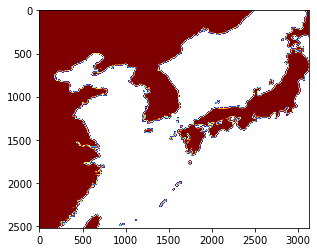

In [11]:
## 지형 내삽 & 어디가 육지고 어디가 바다인지 구분하기
from scipy.interpolate import interpolate
import matplotlib.pyplot as plt

lets_interpolate_topo = interpolate.interp2d(lont, latt, topo, kind = 'linear')
topo_after_interpolation = lets_interpolate_topo(lon_grid_after_interpolation, lat_grid_after_interpolation)[::-1]

#topo_after_interpolation
table_land = np.zeros((number_of_latitude_after_interpolation, number_of_longitude_after_interpolation))
for i in range(number_of_latitude_after_interpolation):
  for j in range(number_of_longitude_after_interpolation):
    if topo_after_interpolation[i][j] > -0.85:
      table_land[i][j] = 1
print((table_land))
print('육지인 지역은 1, 해양인 지역은 0으로 표시하였다.')

plt.imshow(table_land, cmap = hsl256_colorbar)

In [16]:
### 데이터 내삽
## current data를 내삽 할 것이다.
from scipy.interpolate import interpolate

##### 사용해야하는 함수
# 내삽하기 전의 current data를 위치 별로 table형태로 배열하는 함수
# 여기서 current data는 날짜별 데이터
# 즉, 그 날짜의 current_data[날짜]의 [위도][경도][u 또는 v]를 가져오면된다.
def table_current_before_interpolation(data):
  u_before_interpolation = np.zeros((number_of_latitude, number_of_longitude))
  v_before_interpolation = np.zeros((number_of_latitude, number_of_longitude))
  for lat in range(number_of_latitude):
    lat_value = round(lat_grid_before_interpolation[::-1][lat], 3)
    for lon in range(number_of_longitude):
      lon_value = round(lon_grid_before_interpolation[lon], 3)
      if np.isnan(data[str(lat_value) + ' ' + str(lon_value)]['u']) == True:
        pass
      else:
        u_before_interpolation[lat][lon] = data[str(lat_value) + ' ' + str(lon_value)]['u']
      
      if  np.isnan(data[str(lat_value) + ' ' + str(lon_value)]['v']) == True:
        pass
      else:
        v_before_interpolation[lat][lon] = data[str(lat_value) + ' ' + str(lon_value)]['v']

  return u_before_interpolation, v_before_interpolation


##### 사용해야하는 함수
## table 형태의 current data를 내삽하여 더 자세한 형태의 table 형태로 배열해주는 함수
def table_current_after_interpolation(u, v):  
  # 내삽 함수
  lets_interpolate_u = interpolate.interp2d(lon_grid_before_interpolation, lat_grid_before_interpolation, u, kind = 'linear')
  lets_interpolate_v = interpolate.interp2d(lon_grid_before_interpolation, lat_grid_before_interpolation, v, kind = 'linear')

  # 내삽 진행
  u_after_interpolation = lets_interpolate_u(lon_grid_after_interpolation, lat_grid_after_interpolation)
  v_after_interpolation = lets_interpolate_v(lon_grid_after_interpolation, lat_grid_after_interpolation)
  
  return u_after_interpolation, v_after_interpolation

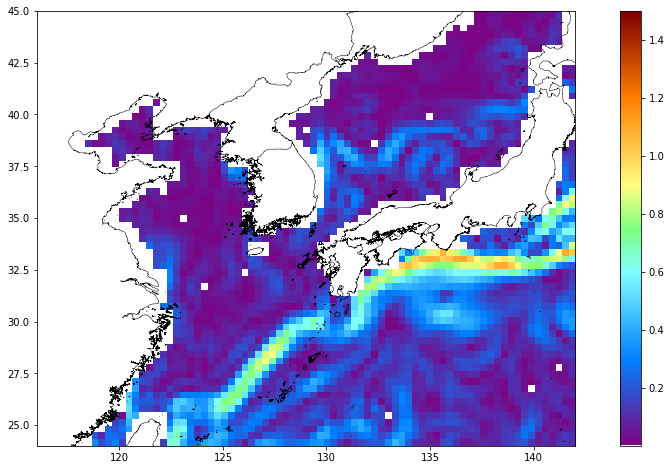

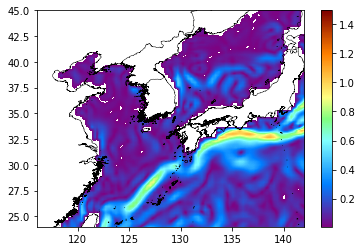

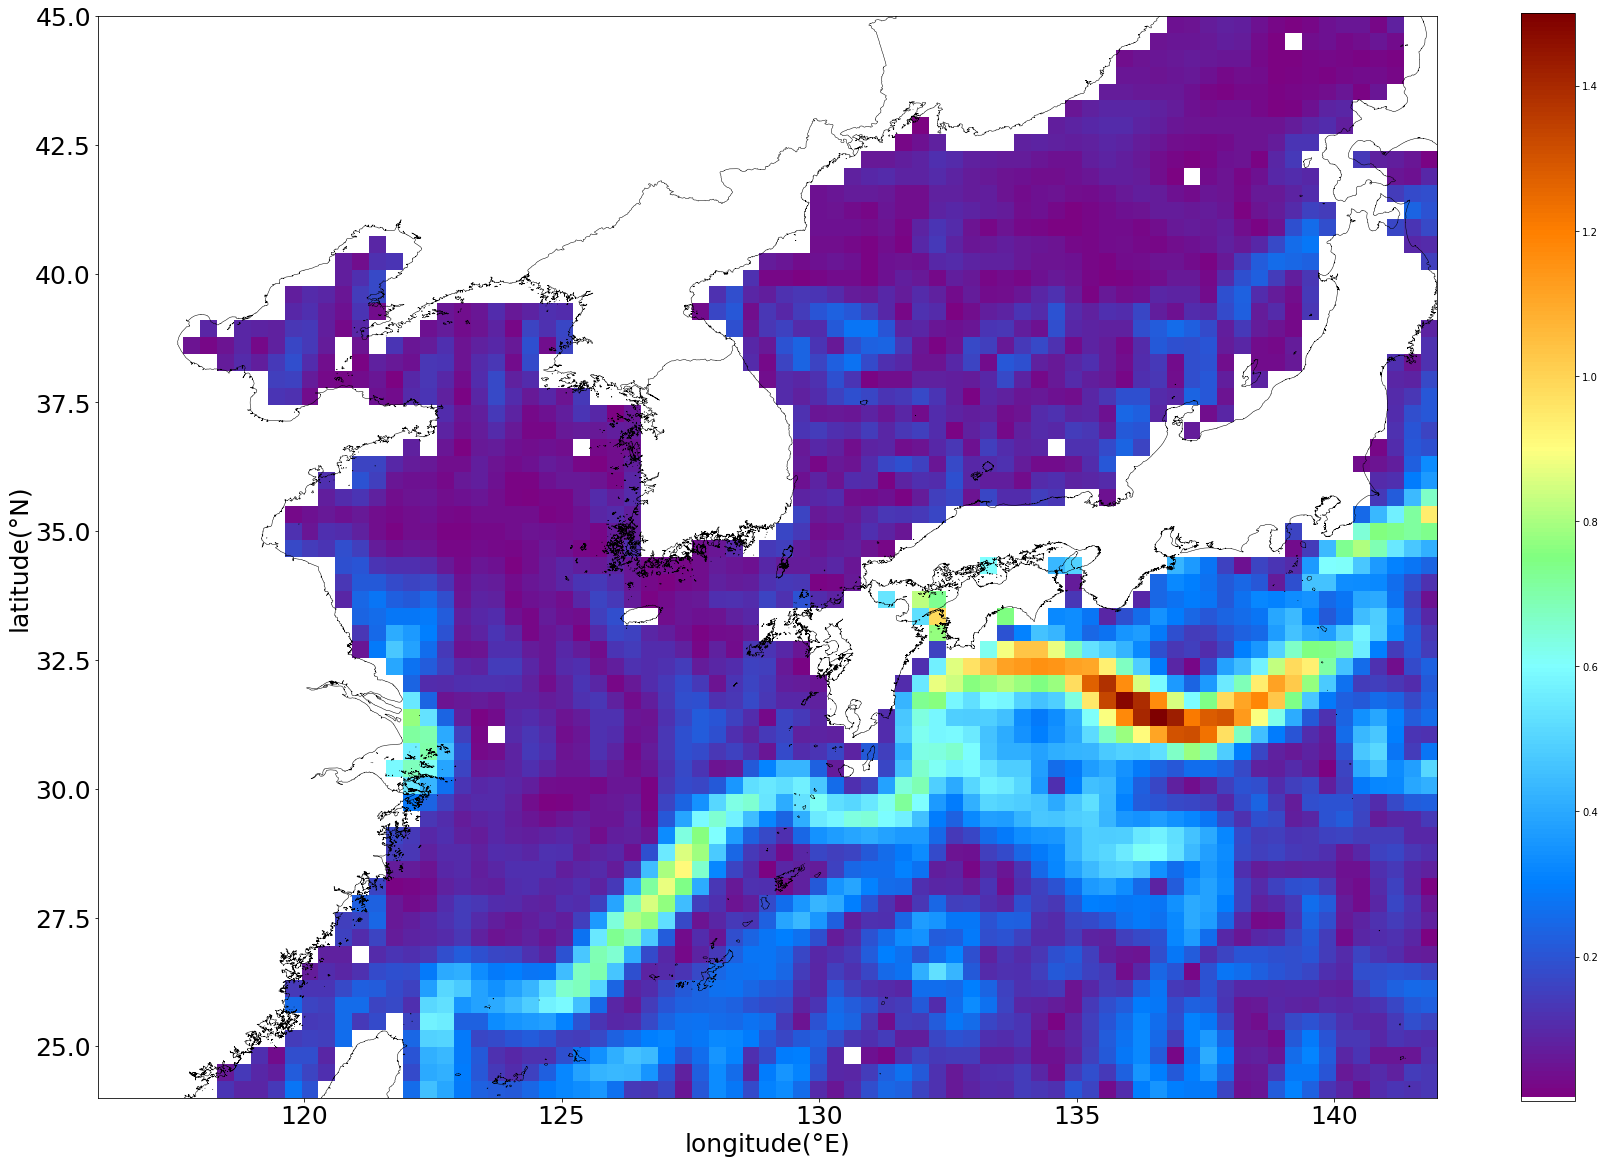

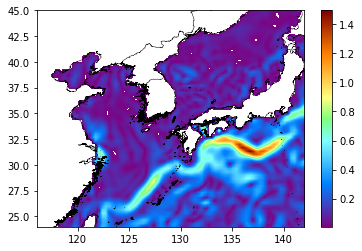

In [24]:
## plot 연습 & 내삽 잘 되었는지 확인
import matplotlib.pyplot as plt

table1 = table_current_before_interpolation(current_data['2016-11-21T00:00:00Z'])
table22 = table_current_after_interpolation(table1[0], table1[1])

# x축 방향 속도 내삽 전 데이터 plot
fig1 = plt.figure(figsize=(16,8))
plt.imshow(np.sqrt(table1[0]**2 + table1[1]**2), cmap = hsl256_colorbar, extent = [min_lon, max_lon, min_lat, max_lat])
plt.colorbar()
plt.clim(np.sqrt(min_validation_u**2 + min_validation_v**2)/10 , 1.5)
plt.plot(lonc, latc, color = 'k', linewidth = 0.5)
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.show()

# x축 방향 속도 내삽 후 데이터 plot (위에서 만든 함수 사용한)
plt.imshow(np.sqrt(table22[0]**2 + table22[1]**2), cmap = hsl256_colorbar, extent = [min_lon, max_lon, min_lat, max_lat])
plt.colorbar()
plt.clim(np.sqrt(min_validation_u**2 + min_validation_v**2)/10 , 1.5)
plt.plot(lonc, latc, color = 'k', linewidth = 0.5)
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)

table117 = table_current_before_interpolation(current_data['2018-02-15T00:00:00Z'])
table2217 = table_current_after_interpolation(table117[0], table117[1])
plt.show()

# x축 방향 속도 내삽 전 데이터 plot
fig1 = plt.figure(figsize=(30,20))
ax = plt.gca()
ax.set_facecolor('w')
plt.imshow(np.sqrt(table117[0]**2 + table117[1]**2), cmap = hsl256_colorbar, extent = [min_lon, max_lon, min_lat, max_lat])
plt.colorbar()
plt.clim(np.sqrt(min_validation_u**2 + min_validation_v**2)/10 , 1.5)
plt.plot(lonc, latc, color = 'k', linewidth = 0.5)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('longitude(\N{DEGREE SIGN}E)', fontsize = 25)
plt.ylabel('latitude(\N{DEGREE SIGN}N)', fontsize = 25)
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.show()

# x축 방향 속도 내삽 후 데이터 plot (위에서 만든 함수 사용한)
plt.imshow(np.sqrt(table2217[0]**2 + table2217[1]**2), cmap = hsl256_colorbar, extent = [min_lon, max_lon, min_lat, max_lat])
plt.colorbar()
plt.clim(np.sqrt(min_validation_u**2 + min_validation_v**2)/10 , 1.5)
plt.plot(lonc, latc, color = 'k', linewidth = 0.5)
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)

plt.show()

In [ ]:
############### 관련 함수 생성
from datetime import datetime    # 날짜 계산

# 지나가는 함수
## 특정 날짜를 date형태로 바꾸어주는 함수
def date_form(time):
  date = datetime(int(time[:4]), int(time[5:7]), int(time[8:10]), int(time[11:13]), int(time[14:16]), int(time[17:19]))
  return date


##### 사용해야하는 함수
## 데이터 간의 날짜 간격을 알려주는 함수 
# t는 '2017-11-21T00:00:00Z' 형태
def data_dt(t):
  if t == unique_time[-1]:
    dt = 5
  else:
    for time in range(len(unique_time)):
      if unique_time[time] == t:
        dt = (date_form(unique_time[time+1]) - date_form(unique_time[time])).days    # 두 시간간의 일 수 차이
        break
  return dt

# 지나가는 함수
## 특정 위도, 경도 위치에서 오른쪽 방향으로 특정 거리(m)만큼 가면 어떤 위도, 경도를 가지는지 알려주는 함수
def where_plastic_go_by_horiz(lat, lon, x):
  dist1deglon = dist_of_1deg_lon_by_lat(lat, lon)
  new_lon = x / dist1deglon + lon
  return new_lon


# 지나가는 함수
## 특정 위도, 경도 위치에서 위쪽 방향으로 특정 거리(m)만큼 가면 어떤 위도, 경도를 가지는지 알려주는 함수
def where_plastic_go_by_vert(lat, lon, y):
  dist1deglat = dist_of_1deg_lat_by_lon(lat, lon)
  new_lat = y / dist1deglat + lat
  return new_lat


##### 사용해야하는 함수
## 최종적으로 위의 과정을 거쳐 어느 지점에 가는지 알려주는 함수(위도, 경도, x 방향 m거리, y 방향 m거리)
def where_plastic_go(lat_num, lon_num, x, y):
  lat = find_lat_from_number(lat_num)
  lon = find_lon_from_number(lon_num)
  new_lon = where_plastic_go_by_horiz(lat, lon, x)
  new_lat = where_plastic_go_by_vert(lat, lon, y)
  return new_lat, new_lon

##### 사용해야하는 함수
## 현재 위치에서 가장 가까운 포인트(위도, 경도)의 데이터 index 찾는 함수
## 1/9 간격으로 내삽한 상황을 기준으로 만들었다. 
def nearest_location(lat, lon):
  int_lat = float(int(lat))
  int_lon = float(int(lon))

  lat_candidate = np.linspace(int_lat, int_lat +1, 4 + 3 * (degree_of_interpolation - 1))
  lon_candidate = np.linspace(int_lon, int_lon +1, 4 + 3 * (degree_of_interpolation - 1))
  
  diff_lat_candidate = [] 
  diff_lon_candidate = [] 
  for candidate in range(len(lat_candidate)):
    diff_lat_candidate.append(abs(lat_candidate[candidate] - lat))
    diff_lon_candidate.append(abs(lon_candidate[candidate] - lon))

  lat_selected = lat_candidate[np.argmin(diff_lat_candidate)]
  lon_selected = lon_candidate[np.argmin(diff_lon_candidate)]

  return find_number_lat_dir(lat_selected), find_number_lon_dir(lon_selected) 

In [ ]:
#### 속도에 따른 update time 변화
def determine_update_time(u, v):
  velocity = np.sqrt(u**2 + v**2)
  if velocity <= 0.02:
    update_time = 24
  elif 0.02 < velocity <= 0.04:
    update_time = 12
  elif 0.04 < velocity <= 0.08:
    update_time = 6
  elif 0.08 < velocity <= 0.16:
    update_time = 3
  elif 0.16 < velocity <= 0.32:
    update_time = 1.5
  elif 0.32 < velocity:
    update_time = 1
    
  return update_time

In [ ]:
      # 육지를 많이 침범하였는지 판단 - 3번판단
      #if table_land[latitude_num][longitude_num] == 1:
      #  x_distance *= 0.9
      #  y_distance *= 0.9
      #  latitude_after_move, longitude_after_move = where_plastic_go(latitude_num, longitude_num, x_distance, y_distance)
      #  latitude_num, longitude_num = nearest_location(latitude_after_move, longitude_after_move)
      #if table_land[latitude_num][longitude_num] == 1:
      #  x_distance *= 0.8
      #  y_distance *= 0.8
      #  latitude_after_move, longitude_after_move = where_plastic_go(latitude_num, longitude_num, x_distance, y_distance)
      #  latitude_num, longitude_num = nearest_location(latitude_after_move, longitude_after_move)
      #if table_land[latitude_num][longitude_num] == 1:
      #  x_distance *= 0.7
      #  y_distance *= 0.7
      # latitude_after_move, longitude_after_move = where_plastic_go(latitude_num, longitude_num, x_distance, y_distance)
      #  latitude_num, longitude_num = nearest_location(latitude_after_move, longitude_after_move)

In [ ]:
############################# 핵심 이동함수 #####################################
##### 주어진 데이터 간격동안 이동하여 어느 위도, 경도에 도착했는지 알려주는 함수.
# t는 '2017-11-21T00:00:00Z' 형태

##### Euler Forward Method 사용
def moving(t, initial_lat_num, initial_lon_num):
  
  # 초기 위도, 경도
  latitude_num,longitude_num = initial_lat_num, initial_lon_num
 
  # 다음 데이터가 있는 날짜와의 간격
  # 며칠 간격인지
  dt = data_dt(t)

  # 딕셔너리에서 초기 속도 추출
  # 해당 위치의 속도
  u_plastic = u_after_interpolation[latitude_num][longitude_num]
  v_plastic = v_after_interpolation[latitude_num][longitude_num]


  # 총 움직이는 횟수
  # 데이터 간격동안 플라스틱의 속도를 업데이트 해주는 횟수
  update_time = determine_update_time(u_plastic, v_plastic)
  number_of_moving = int(dt * 24 / update_time)

  #################
  # 해양 플라스틱 쓰레기를 이동을 시켜봅시다.
  for move in range(number_of_moving):    # 이동 횟수
    # \Delta x와 \Delta y
    #vel = np.sqrt(u_plastic**2 + v_plastic**2)
    #if vel < np.sqrt(min_validation_u**2 + min_validation_v**2)/10:
    if table_land[latitude_num][longitude_num] == 1:
      x_distance = 0
      y_distance = 0
    else:
      x_distance = u_plastic * 3600 * update_time  +  np.random.normal(loc = 0, scale =1) * np.sqrt(2 * 10 * update_time * 3600) 
      y_distance = v_plastic * 3600 * update_time  +  np.random.normal(loc = 0, scale =1) * np.sqrt(2 * 10 * update_time * 3600) 

    # 6시간 동안 이동하여 도착한 새로운 위도, 경도 구하기
    latitude_after_move, longitude_after_move = where_plastic_go(latitude_num, longitude_num, x_distance, y_distance)

    # 그 도착한 지점에서 가장 가까운 1/9 위도, 경도 위치
    latitude_num, longitude_num = nearest_location(latitude_after_move, longitude_after_move)
    #latitude = find_lat_from_number(latitude_num)
    #longitude = find_lon_from_number(longitude_num)

    # 새롭게 도착한 지점에서의 새로운 속도
    if 0 < latitude_num < number_of_latitude_after_interpolation and 0 < longitude_num < number_of_longitude_after_interpolation:
      u_plastic = u_after_interpolation[latitude_num][longitude_num]
      v_plastic = v_after_interpolation[latitude_num][longitude_num]
      #if table_land[latitude_num][longitude_num] == 1.:
      #  u_plastic = 0
      #  v_plastic = 0
      #else:
      #  u_plastic = u_after_interpolation[latitude_num][longitude_num]
      #  v_plastic = v_after_interpolation[latitude_num][longitude_num]
    else:
      break

  return latitude_num, longitude_num

In [25]:
##### 황해로 유입되는 강
river = yellowsea_river_data.river
#print(river)
country = yellowsea_river_data.country
#print(country)
region = yellowsea_river_data.region
direction = yellowsea_river_data.direction
plastic_lat = yellowsea_river_data.lat
plastic_lon = yellowsea_river_data.lon
plastic_kg_per_yr = yellowsea_river_data.plastic_per_year

river_feature_dict = dict()
for r in range(len(river)):
  river_name = river[r]
  river_feature_dict[river_name] = {'center_plastic_lon' : plastic_lon[r], 'center_plastic_lat' : plastic_lat[r], 'plastic_index' : plastic_kg_per_yr[r], 'dir' : direction[r], 'country' : country[r], 'region' : region[r]}
print(river_feature_dict)

unique_region = np.unique(region).tolist()
print(unique_region)


## 지역별 강 분류
unique_region = np.unique(region).tolist()

s_korea_river = []; n_korea_river = []; japan_river = []; hubei_river = []; jiangsu_river = []
liaoning_river = []; shandong_river = []; zhejiang_river = []; taiwan_river = []; russia_river = []

for r in range(len(river)):
  river_name = river[r]
  region = river_feature_dict[river_name]['region']
  if region == 's korea':
    s_korea_river.append(river_name)
  elif region == 'n korea':
    n_korea_river.append(river_name)
  elif region == 'japan':
    japan_river.append(river_name)
  elif region == 'hubei':
    hubei_river.append(river_name)
  elif region == 'jiangsu':
    jiangsu_river.append(river_name)
  elif region == 'liaoning':
    liaoning_river.append(river_name)
  elif region == 'shandong':
    shandong_river.append(river_name)
  elif region == 'zhejiang':
    zhejiang_river.append(river_name)
  elif region == 'taiwan':
    taiwan_river.append(river_name)
  elif region == 'russia':
    russia_river.append(river_name)

print(s_korea_river) 
print(n_korea_river) 
print(japan_river)
print(hubei_river) 
print(jiangsu_river)
print(liaoning_river)
print(shandong_river)
print(zhejiang_river) 
print(taiwan_river) 
print(russia_river)

{'han': {'center_plastic_lon': 126.25, 'center_plastic_lat': 37.4, 'plastic_index': 169000, 'dir': 'west', 'country': 'KOR', 'region': 's korea'}, 'geum': {'center_plastic_lon': 126.4, 'center_plastic_lat': 35.8, 'plastic_index': 10700, 'dir': 'west', 'country': 'KOR', 'region': 's korea'}, 'yeongsan': {'center_plastic_lon': 125.95, 'center_plastic_lat': 34.6, 'plastic_index': 14700, 'dir': 'west', 'country': 'KOR', 'region': 's korea'}, 'nakdong': {'center_plastic_lon': 128.92, 'center_plastic_lat': 34.6, 'plastic_index': 19400, 'dir': 'south', 'country': 'KOR', 'region': 's korea'}, 'taehwa': {'center_plastic_lon': 129.5, 'center_plastic_lat': 35.4, 'plastic_index': 7900, 'dir': 'south', 'country': 'KOR', 'region': 's korea'}, 'anseongcheon': {'center_plastic_lon': 126.25, 'center_plastic_lat': 37.1, 'plastic_index': 19100, 'dir': 'northwest', 'country': 'KOR', 'region': 's korea'}, 'amrok': {'center_plastic_lon': 124.31, 'center_plastic_lat': 39.45, 'plastic_index': 12350, 'dir': 's

In [26]:
## 지역별 feature 딕셔너리 새로 만들기

def make_region_river_dict(region_rivers):
  region_river_dict = dict()
  for r in range(len(region_rivers)):
    river_name = region_rivers[r]
    river_features = river_feature_dict[river_name]
    region_river_dict[river_name] = river_features
  return region_river_dict

s_korea_river_dict = make_region_river_dict(s_korea_river)
n_korea_river_dict = make_region_river_dict(n_korea_river)
japan_river_dict = make_region_river_dict(japan_river)
hubei_river_dict = make_region_river_dict(hubei_river)
jiangsu_river_dict = make_region_river_dict(jiangsu_river)
liaoning_river_dict = make_region_river_dict(liaoning_river)
shandong_river_dict = make_region_river_dict(shandong_river)
zhejiang_river_dict = make_region_river_dict(zhejiang_river)
taiwan_river_dict = make_region_river_dict(taiwan_river)
russia_river_dict = make_region_river_dict(russia_river)

print(s_korea_river_dict)

{'han': {'center_plastic_lon': 126.25, 'center_plastic_lat': 37.4, 'plastic_index': 169000, 'dir': 'west', 'country': 'KOR', 'region': 's korea'}, 'geum': {'center_plastic_lon': 126.4, 'center_plastic_lat': 35.8, 'plastic_index': 10700, 'dir': 'west', 'country': 'KOR', 'region': 's korea'}, 'yeongsan': {'center_plastic_lon': 125.95, 'center_plastic_lat': 34.6, 'plastic_index': 14700, 'dir': 'west', 'country': 'KOR', 'region': 's korea'}, 'nakdong': {'center_plastic_lon': 128.92, 'center_plastic_lat': 34.6, 'plastic_index': 19400, 'dir': 'south', 'country': 'KOR', 'region': 's korea'}, 'taehwa': {'center_plastic_lon': 129.5, 'center_plastic_lat': 35.4, 'plastic_index': 7900, 'dir': 'south', 'country': 'KOR', 'region': 's korea'}, 'anseongcheon': {'center_plastic_lon': 126.25, 'center_plastic_lat': 37.1, 'plastic_index': 19100, 'dir': 'northwest', 'country': 'KOR', 'region': 's korea'}}


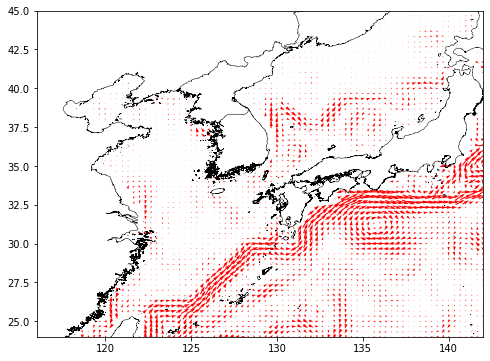

In [ ]:
# x축 방향 속도 내삽 후 데이터 벡터형

fig1 = plt.figure(figsize=(8,6))
ax = plt.gca()
ax.set_facecolor('w')
plt.plot(lonc, latc, color = 'k', linewidth = 0.5)
plt.quiver(lon_meshgrid_before_interpolation, lat_meshgrid_before_interpolation[::-1], table1[0], table1[1], color = 'r', minlength = 0,  scale = 30, pivot = 'mid')
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.show()

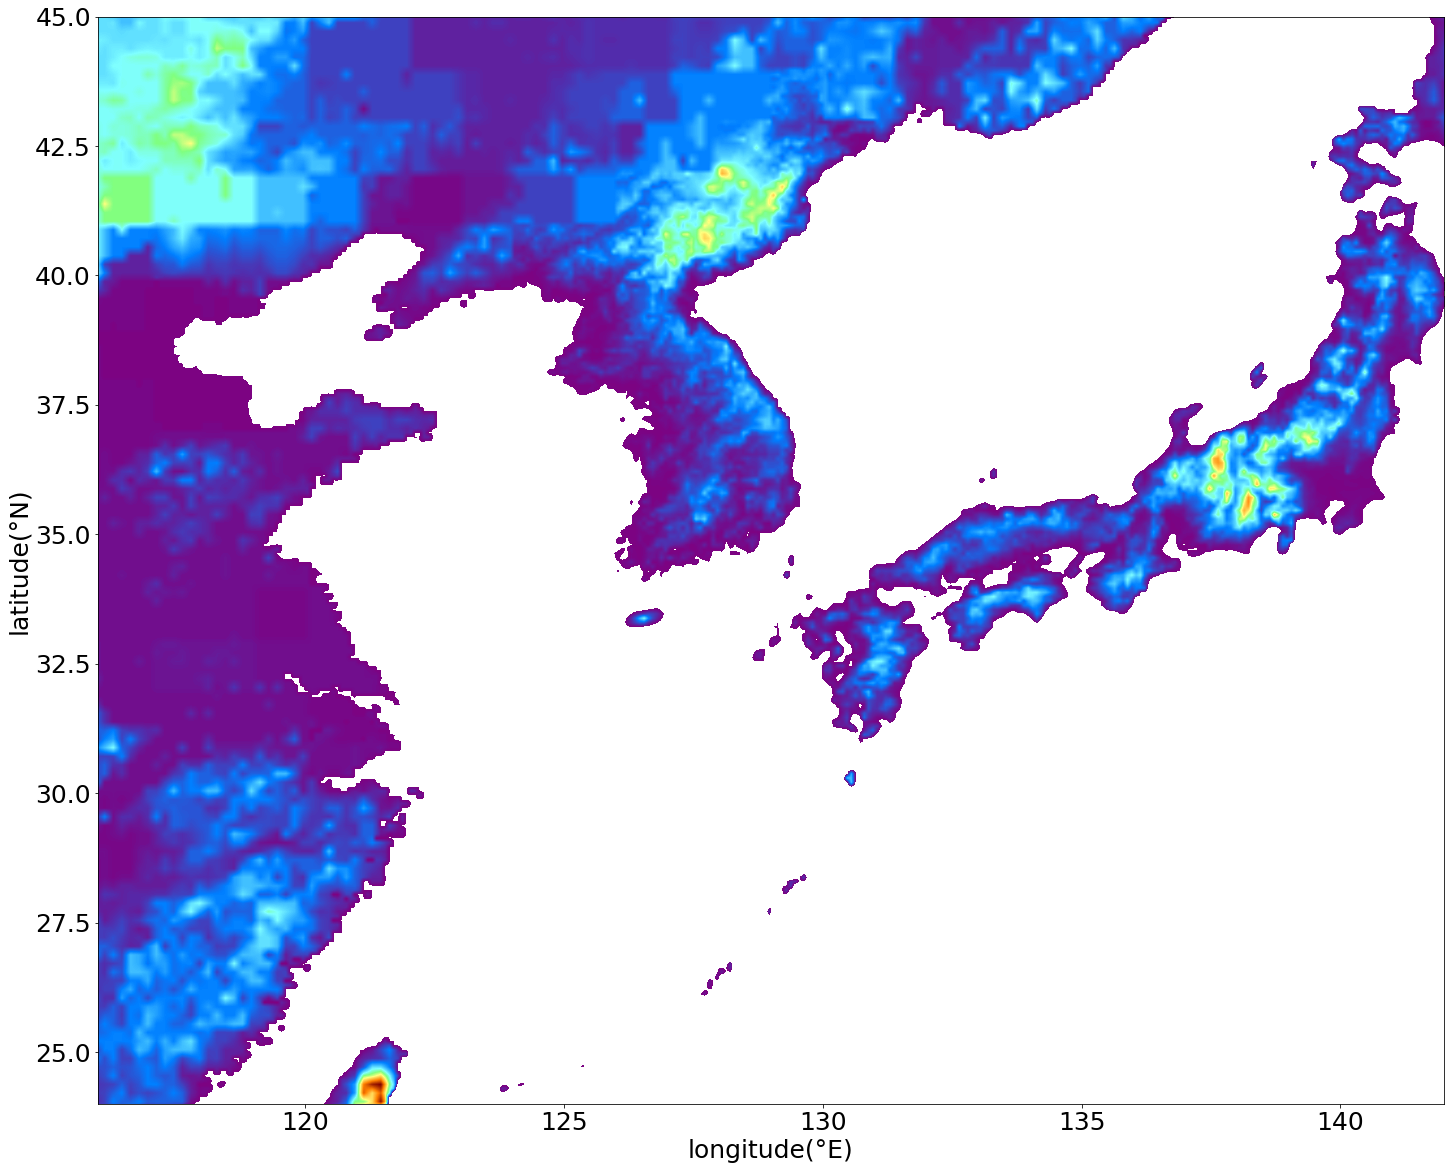

In [14]:
# 동아시아 해양 지형
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
ax = plt.gca()
ax.set_facecolor('w')
#plt.plot(lonc, latc, color = 'k', linewidth = 0.5)
plt.imshow(topo_after_interpolation, cmap = hsl256_colorbar, extent = [min_lon, max_lon, min_lat, max_lat])
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
#plt.ylim(34.5, 36.5)
#plt.xlim(128.5, 130.5)
plt.clim(-12.5, )
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('longitude(\N{DEGREE SIGN}E)', fontsize = 25)
plt.ylabel('latitude(\N{DEGREE SIGN}N)', fontsize = 25)
plt.show()

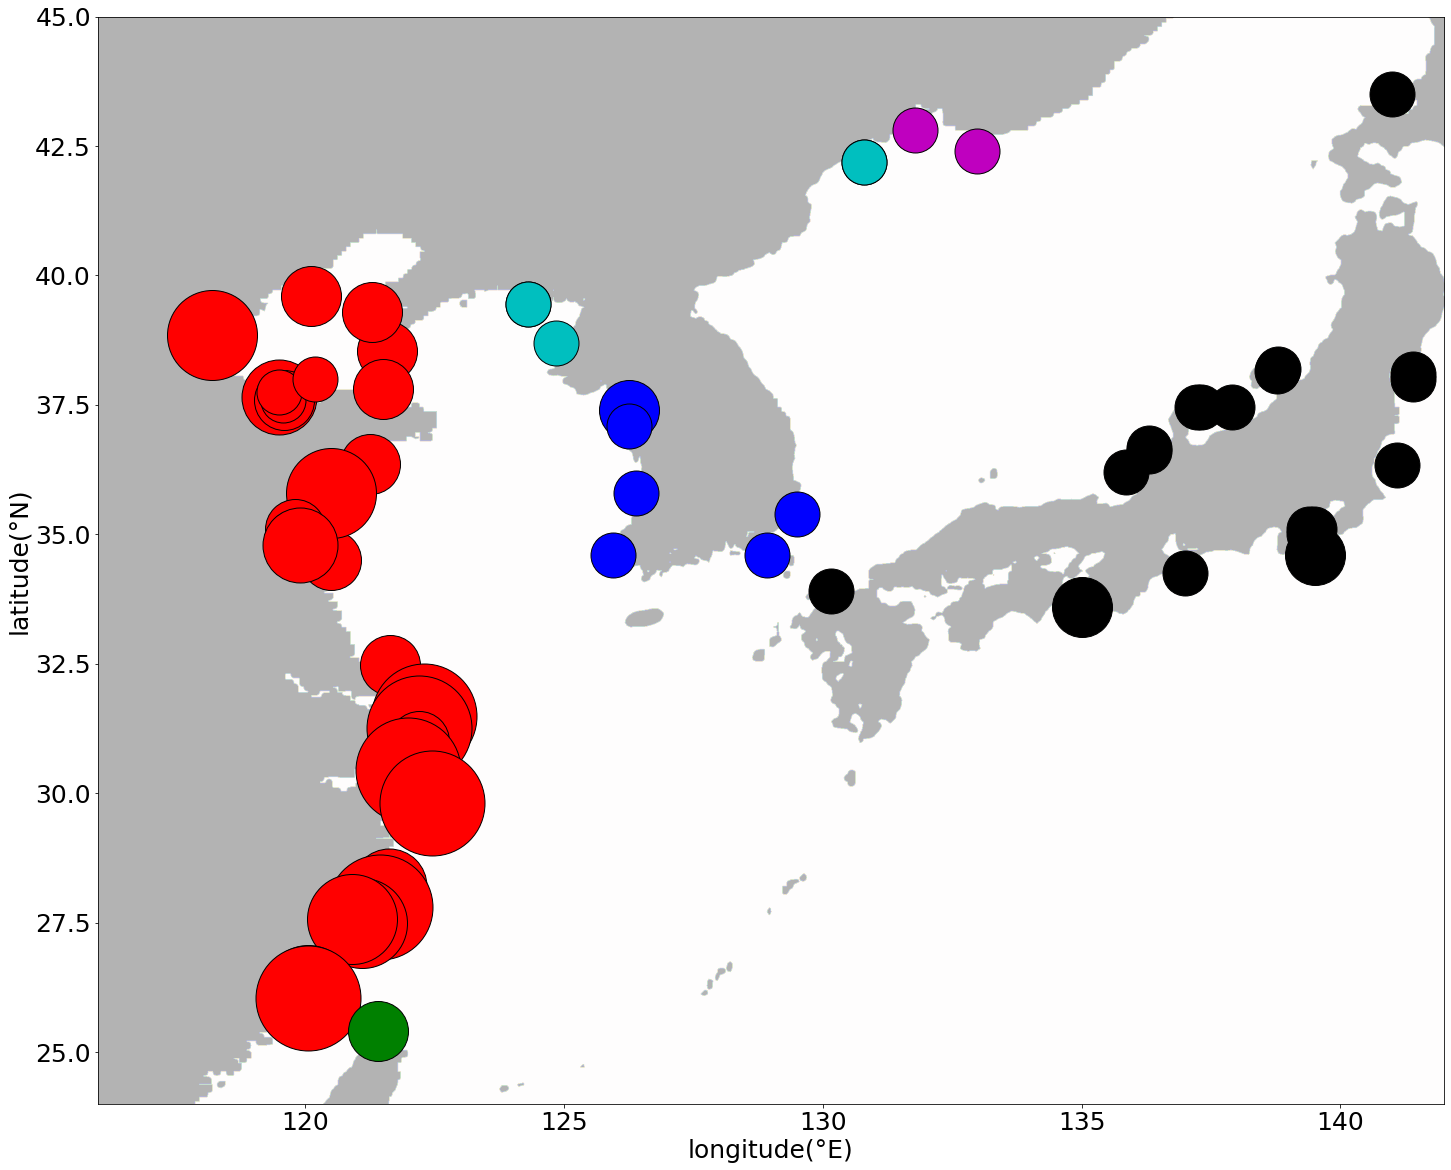

In [31]:
### 동아시아 해역으로 유입되는 강들과 플라스틱 유입량
all_region_dict = s_korea_river_dict, japan_river_dict, hubei_river_dict, jiangsu_river_dict, liaoning_river_dict, shandong_river_dict, zhejiang_river_dict, taiwan_river_dict, russia_river_dict, n_korea_river_dict
all_region_color = 'b', 'k', 'r', 'r', 'r', 'r', 'r', 'g', 'm', 'c'
all_region_river = s_korea_river, japan_river, hubei_river, jiangsu_river, liaoning_river, shandong_river, zhejiang_river, taiwan_river, russia_river , n_korea_river


fig1 = plt.figure(figsize=(30,20))
ax = plt.gca()
ax.set_facecolor('w')
#plt.plot(lonc, latc, color = 'k', linewidth = 0.5)

for region in range(len(all_region_dict)):
  region_dict = all_region_dict[region]
  region_river = all_region_river[region]
  region_color = all_region_color[region]
  
  for r in range(len(region_dict)):
    river_name = region_river[r]
    river_lat = region_dict[river_name]['center_plastic_lat']
    river_lon = region_dict[river_name]['center_plastic_lon']
    river_plastic = (region_dict[river_name]['plastic_index'])
    if river_plastic > 1000000:
      size = 105
    elif 500000 < river_plastic <1000000:
      size = 90
    elif 250000 < river_plastic < 500000:
      size = 75
    elif 100000 < river_plastic < 250000:
      size = 60
    else:
      size = 45
    plt.plot(river_lon, river_lat, marker = 'o', color = region_color, markersize = size, markeredgecolor = 'k' )
plt.imshow(table_land, cmap = 'gist_earth_r', extent = [min_lon, max_lon, min_lat, max_lat], alpha = 0.3)
plt.clim(0, 1)
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('longitude(\N{DEGREE SIGN}E)', fontsize = 25)
plt.ylabel('latitude(\N{DEGREE SIGN}N)', fontsize = 25)
plt.show()

In [ ]:
##### 각 강 주변의 지형 확인 및 어디에서 쓰레기를 시작시킬지 판단

fig = plt.figure(figsize=(20,90))
for i in range(len(river_feature_dict)):
#for i in range(6):
  river_name = str(river[i])
  river_lat = river_feature_dict[river_name]['center_plastic_lat']
  river_lon = river_feature_dict[river_name]['center_plastic_lon']

  plt.subplot(20, 4, i+1)
  min_river_lat = river_lat - 0.5
  max_river_lat = river_lat + 0.5
  min_river_lon = river_lon - 0.5
  max_river_lon = river_lon + 0.5
  
  min_river_lat_num = find_number_lat_dir(max_river_lat)
  max_river_lat_num = find_number_lat_dir(min_river_lat)
  min_river_lon_num = find_number_lon_dir(min_river_lon)
  max_river_lon_num = find_number_lon_dir(max_river_lon)

  river_table_u = []
  river_table_v = []
  for yl in range(max_river_lat_num - min_river_lat_num):
    river_table_u.append(list(table22[0])[yl + min_river_lat_num][min_river_lon_num : max_river_lon_num])
    river_table_v.append(list(table22[1])[yl + min_river_lat_num][min_river_lon_num : max_river_lon_num])
    
  plot_extent = [min_river_lon, max_river_lon, min_river_lat, max_river_lat]
  river_table = np.sqrt(np.array(river_table_u)**2 + np.array(river_table_v)**2)
  
  min_river_lat_num2 = find_number_lat_dir_before_interpolation(max_river_lat)
  max_river_lat_num2 = find_number_lat_dir_before_interpolation(min_river_lat)
  min_river_lon_num2 = find_number_lon_dir_before_interpolation(min_river_lon)
  max_river_lon_num2 = find_number_lon_dir_before_interpolation(max_river_lon)
  
  river_table_u2 = []
  river_table_v2 = []
  river_lon_meshgrid = []
  river_lat_meshgrid = []
  for yll in range(max_river_lat_num2 - min_river_lat_num2):
    river_table_u2.append(list(table1[0])[yll + min_river_lat_num2][min_river_lon_num2 : max_river_lon_num2])
    river_table_v2.append(list(table1[1])[yll + min_river_lat_num2][min_river_lon_num2 : max_river_lon_num2])
    river_lon_meshgrid.append(lon_meshgrid_after_interpolation[yll + min_river_lat_num2][min_river_lon_num2 : max_river_lon_num2])
    river_lat_meshgrid.append(lat_meshgrid_after_interpolation[yll + min_river_lat_num2][min_river_lon_num2 : max_river_lon_num2])
  
  plt.imshow(river_table, cmap = hsl256_colorbar, extent = plot_extent)
  plt.colorbar()
  plt.clim(np.sqrt(min_validation_u**2 + min_validation_v**2), 0.3)

  plt.quiver(lon_meshgrid_before_interpolation, lat_meshgrid_before_interpolation[::-1], table1[0], table1[1], color = 'r', minlength = 0,  scale = 1)
  #plt.quiver(river_lon_meshgrid, river_lat_meshgrid[::-1], river_table_u2, river_table_v2, color = 'r', minlength = 10,  scale = 100, pivot = 'mid')
  plt.plot(lonc, latc, color = 'k', linewidth = 0.5)
  plt.plot(river_lon, river_lat, marker = '*', color = 'r', markersize = 8)
  plt.xlim(min_river_lon, max_river_lon)
  plt.ylim(min_river_lat, max_river_lat)
  plt.title(river_name)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
## 월별 배수량 index

## 주어진 데이터가 몇월 데이터인지 판단하는 함수
def what_month(t):
  month = float(t[5:7])
  if month == 1.:
    MON = 'JAN'
  elif month == 2.:
    MON = 'FEB'
  elif month == 3.:
    MON = 'MAR'
  elif month == 4.:
    MON = 'APR'
  elif month == 5.:
    MON = 'MAY'
  elif month == 6.:
    MON = 'JUN'
  elif month == 7.:
    MON = 'JUL'
  elif month == 8.:
    MON = 'AUG'
  elif month == 9.:
    MON = 'SEP'
  elif month == 10.:
    MON = 'OCT'
  elif month == 11.:
    MON = 'NOV'
  elif month == 12.:
    MON = 'DEC'

  return MON


## 해당되는 월의 discharge index를 가져오는 함수
# 'APR' 형태로 입력
def monthly_discharge_index(MON):
  discharge_index = river_discharge_data[MON][0]

  return discharge_index

In [ ]:
############# 플라스틱을 추가할지 말지 정하는 함수
### 플라스틱은 첫번째 데이터 날짜를 기준으로,
### 일의 10의 자리 숫자가 동일한 가장 첫번째 날짜에 추가된다.
### 단, 맨 마지막 데이터 날짜에는 추가되지 않는다.

#def plastic_in_or_not(day):
 # date_index = list(unique_time).index(day)
  #if date_index == 0:
   # plastic_inlet = 1.
  #elif day[8] == unique_time[0][8] and unique_time[date_index - 1][8] != day[8]:
  #  plastic_inlet = 1.
  #else:
  #  plastic_inlet = 0. 
  #return plastic_inlet

def plastic_in_or_not(day):
  date_index = list(unique_time).index(day)
  if date_index % 2 == 0:
    plastic_inlet = 1.
  else:
    plastic_inlet = 0.
  return plastic_inlet
  

##################### 정해진 중심을 기준으로 일정 거리내의 랜덤한 위치에서 플라스틱을 유입하는 경우 ###############
def add_plastic_to_table_randomly(t, table):
  # 해당 데이터의 월
  MON = what_month(t)

  # 월별 배수량 index
  discharge_index = monthly_discharge_index(MON)

  # 플라스틱을 유입시킬지 말지 결정 : 'yes' : 1 or 'no' : 0
  #plastic_inlet = plastic_in_or_not(t)

  for i in range(len(river)):
    # 강 이름
    river_name = river[i]

    # 해당 강의 plastic index
    #plastic_index = river_feature_dict[river_name]['plastic_index'] * discharge_index * plastic_inlet / 100000
    plastic_index = river_feature_dict[river_name]['plastic_index'] * discharge_index  / 100000

    number_of_plastic = int(plastic_index * plastic_constant)
    for plastic in range(number_of_plastic):
      # center값으로부터 랜덤한 거리만큼 떨어진 지점에 위도, 경도 구하기
      if river_feature_dict[river_name]['dir'] == 'west': # 한강, 금강, 영산강
        plastic_lat =  river_feature_dict[river_name]['center_plastic_lat'] + np.random.normal(loc = 0, scale = plastic_distribution/2)
        plastic_lon =  river_feature_dict[river_name]['center_plastic_lon'] - np.abs(np.random.normal(loc = 0, scale = plastic_distribution*2))
      
      elif river_feature_dict[river_name]['dir'] == 'east': # 황하, 회수, 장강
        plastic_lat =  river_feature_dict[river_name]['center_plastic_lat'] + np.random.normal(loc = 0, scale = plastic_distribution/2)
        plastic_lon =  river_feature_dict[river_name]['center_plastic_lon'] + np.abs(np.random.normal(loc = 0, scale = plastic_distribution*2))

      elif river_feature_dict[river_name]['dir'] == 'south': # 요하
        plastic_lat =  river_feature_dict[river_name]['center_plastic_lat'] - np.abs(np.random.normal(loc = 0, scale = plastic_distribution*2))
        plastic_lon =  river_feature_dict[river_name]['center_plastic_lon'] + np.random.normal(loc = 0, scale = plastic_distribution/2)

      elif river_feature_dict[river_name]['dir'] == 'north': 
        plastic_lat =  river_feature_dict[river_name]['center_plastic_lat'] + np.abs(np.random.normal(loc = 0, scale = plastic_distribution*2))
        plastic_lon =  river_feature_dict[river_name]['center_plastic_lon'] + np.random.normal(loc = 0, scale = plastic_distribution/2)

      elif river_feature_dict[river_name]['dir'] == 'northwest': 
        alpha = np.abs(np.random.normal(loc = 0, scale = plastic_distribution*2))
        beta = np.abs(np.random.normal(loc = alpha, scale = plastic_distribution/2))
        plastic_lat =  river_feature_dict[river_name]['center_plastic_lat'] + alpha
        plastic_lon =  river_feature_dict[river_name]['center_plastic_lon'] - beta

      elif river_feature_dict[river_name]['dir'] == 'northeast': 
        alpha = np.abs(np.random.normal(loc = 0, scale = plastic_distribution*2))
        beta = np.abs(np.random.normal(loc = alpha, scale = plastic_distribution/2))
        plastic_lat =  river_feature_dict[river_name]['center_plastic_lat'] + alpha
        plastic_lon =  river_feature_dict[river_name]['center_plastic_lon'] + beta

      elif river_feature_dict[river_name]['dir'] == 'southwest': 
        alpha = np.abs(np.random.normal(loc = 0, scale = plastic_distribution*2))
        beta = np.abs(np.random.normal(loc = alpha, scale = plastic_distribution/2))
        plastic_lat =  river_feature_dict[river_name]['center_plastic_lat'] - alpha
        plastic_lon =  river_feature_dict[river_name]['center_plastic_lon'] - beta
      
      elif river_feature_dict[river_name]['dir'] == 'southeast': 
        alpha = np.abs(np.random.normal(loc = 0, scale = plastic_distribution*2))
        beta = np.abs(np.random.normal(loc = alpha, scale = plastic_distribution/2))
        plastic_lat =  river_feature_dict[river_name]['center_plastic_lat'] - alpha
        plastic_lon =  river_feature_dict[river_name]['center_plastic_lon'] + beta

      # 위에서 구한 위도, 경도가 테이블 상에서 어느 위치에 해당하는지 구하기
      if min_lat < plastic_lat < max_lat and min_lon < plastic_lon < max_lon:
        plastic_lat_number = find_number_lat_dir(plastic_lat)
        plastic_lon_number = find_number_lon_dir(plastic_lon)

        # 해당위치에 plastic index 곱하여서 더하기
        table[plastic_lat_number][plastic_lon_number] += 1
  
  return table

In [ ]:
############# 플라스틱 테이블 업데이트 함수
##### 주기적으로 플라스틱을 추가해야하고
##### 플라스틱의 새로운 위치를 지정해주어야한다.(기존 위치에서 그 값을 빼고 새로운 위치에 그 값을 더해주는 함수)

# 여기서 day는 NOAA 데이터의 해당날짜이다. - '2017-11-21T00:00:00Z' 형태
def update_plastic_table(day, plastic_table):

  # 내삽 전
  #u_before_interpolation, v_before_interpolation = table_current_before_interpolation(current_data[day])
  
  # 내삽
  #u_after_interpolation, v_after_interpolation = table_current_after_interpolation(u_before_interpolation, v_before_interpolation)

  #######################################################################
  # 초기위치에서 새로운 쓰레기 유입
  new_plastic_table = add_plastic_to_table_randomly(day, plastic_table)
  added_table = np.zeros((number_of_latitude_after_interpolation, number_of_longitude_after_interpolation))  

  for i in range(number_of_latitude_after_interpolation):
    for j in range(number_of_longitude_after_interpolation):

      if plastic_table[i][j] > 0.:
        plastic_number = plastic_table[i][j]

        # 이동한 후의 새로운 위도, 경도 구하기
        new_latitude_num, new_longitude_num = moving(day, i, j)
        
        # 새로운 위도, 경도에 해당하는 table 위치에 숫자 더해서 넣기(중복으로 이 위치에 다른 곳에서 올 수도 있으므로 더해서 넣어야한다.)
        # 만약 그리드를 벗어나면 안되기 때문에 그리드 내에 있는 것만 이동시키기
        if 0 < new_latitude_num < number_of_latitude_after_interpolation and 0 < new_longitude_num < number_of_longitude_after_interpolation:
          added_table[new_latitude_num][new_longitude_num] += plastic_number
          new_plastic_table[i][j] -= plastic_number
        else:
          new_plastic_table[i][j] -= plastic_number
          
      else:
        pass

  new_plastic_table += added_table

  return new_plastic_table

38939.0


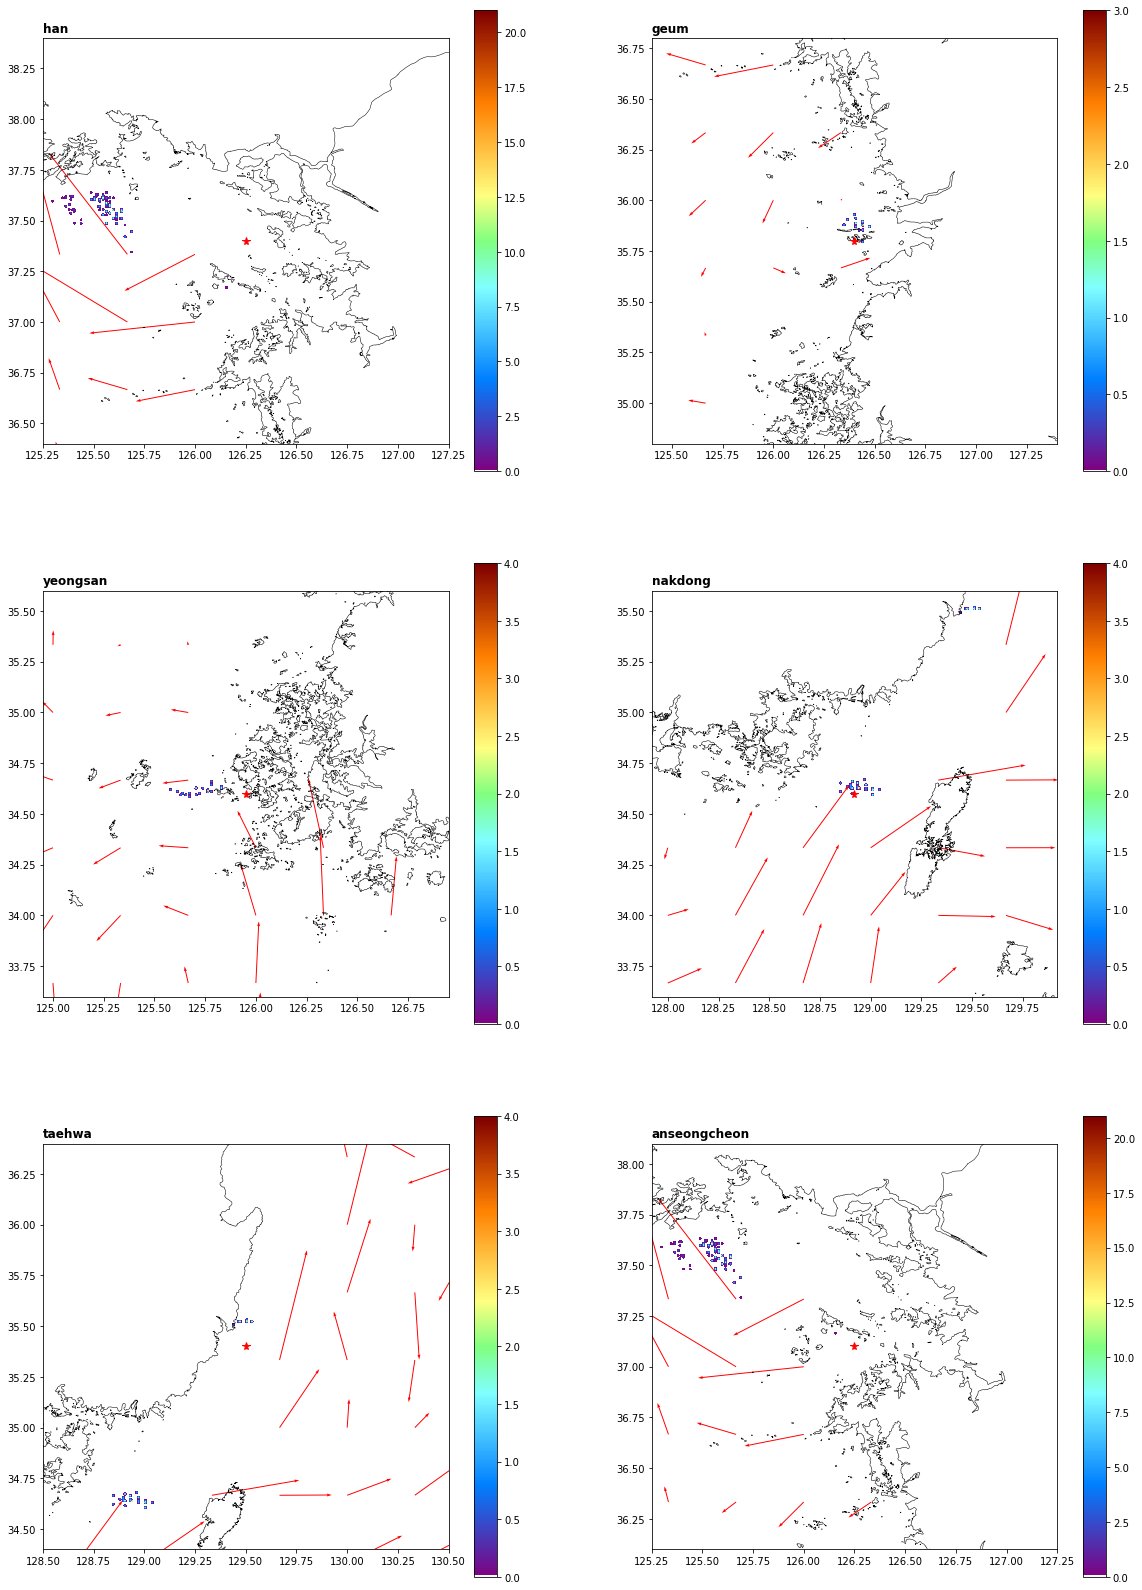

In [ ]:
## 플라스틱 정보 업데이트가 제대로 되는지 확인하기
import matplotlib.pyplot as plt

# 1. 내삽 전 데이터 테이블화
u_before_interpolation, v_before_interpolation = table_current_before_interpolation(current_data['2016-11-21T00:00:00Z'])

# 2. 내삽
u_after_interpolation, v_after_interpolation = table_current_after_interpolation(u_before_interpolation, v_before_interpolation)

# 3. 플라스틱 테이블 생성
plastic_table = np.zeros((number_of_latitude_after_interpolation, number_of_longitude_after_interpolation))  

# 4. 플라스틱 테이블 업데이트
new_table_practice = update_plastic_table('2016-11-21T00:00:00Z', plastic_table)
print(np.sum(new_table_practice))

# 플랏 그리기
fig = plt.figure(figsize=(20,100))
#for i in range(len(river)):
for i in range(6):
  river_name = river[i]
  river_lat = river_feature_dict[river_name]['center_plastic_lat']
  river_lon = river_feature_dict[river_name]['center_plastic_lon']

  plt.subplot(10, 2, i+1)
  min_river_lat = river_lat - 1.
  max_river_lat = river_lat + 1.
  min_river_lon = river_lon - 1.
  max_river_lon = river_lon + 1.

  min_river_lat_num = find_number_lat_dir(max_river_lat)
  max_river_lat_num = find_number_lat_dir(min_river_lat)
  min_river_lon_num = find_number_lon_dir(min_river_lon)
  max_river_lon_num = find_number_lon_dir(max_river_lon)

  river_new_table_practice = []
  for yl in range(max_river_lat_num - min_river_lat_num):
    river_new_table_practice.append(new_table_practice[yl + min_river_lat_num][min_river_lon_num : max_river_lon_num])
  plot_extent = [min_river_lon, max_river_lon, min_river_lat, max_river_lat]
  plt.imshow(river_new_table_practice, cmap = hsl256_colorbar, extent = plot_extent)
  
  plt.colorbar()
  plt.plot(lonc, latc, color = 'k', linewidth = 0.5)
  plt.quiver(lon_meshgrid_before_interpolation, lat_meshgrid_before_interpolation[::-1], table1[0], table1[1], color = 'r', minlength = 0,  scale = 1)
  plt.plot(river_lon, river_lat, marker = '*', color = 'r', markersize = 8)
  plt.xlim(min_river_lon, max_river_lon)
  plt.ylim(min_river_lat, max_river_lat)
  plt.clim(0, 30)
  plt.title(river_name, loc = 'left', fontweight = 'bold')

plt.show()

In [ ]:
##### 이제 10개 지역별로 각각 플라스틱을 이동시키는 시뮬레이션을 할 것이다.
###############################################################################################################
#### 주의 ##############
## 시뮬레이션할 때 이외엔 건들지 말 것

# 1. 내삽 전 데이터 테이블화
#u_before_interpolation, v_before_interpolation = table_current_before_interpolation(current_data['2017-11-21T00:00:00Z'])

# 2. 내삽
#u_after_interpolation, v_after_interpolation = table_current_after_interpolation(u_before_interpolation, v_before_interpolation)

# 3. 플라스틱 테이블 생성
#plastic_table = np.zeros((number_of_latitude_after_interpolation, number_of_longitude_after_interpolation))  

# 4. 플라스틱 테이블 업데이트
#new_table_practice = update_plastic_table('2016-11-21T00:00:00Z', plastic_table)
#print(np.sum(new_table_practice))


#all_region = 's_korea', 'n_korea', 'japan', 'hubei', 'jiangsu', 'liaoning', 'shandong', 'zhejiang', 'taiwan', 'russia'
#all_river = s_korea_river, n_korea_river, japan_river, hubei_river, jiangsu_river, liaoning_river, shandong_river, zhejiang_river, taiwan_river, russia_river
all_region =  'shandong', 'zhejiang', 'taiwan', 'russia'
all_river =   shandong_river, zhejiang_river, taiwan_river, russia_river


# 중국, 러시아, 대만
for region in range(3):
  river = all_river[region]
  region_name = all_region[region]
  print(region_name)
  
  # 3. 플라스틱 테이블 생성
  plastic_table_list = []
  plastic_table = np.zeros((number_of_latitude_after_interpolation, number_of_longitude_after_interpolation))
  plastic_table_list.append(plastic_table)
  
  for day in range(len(unique_time)):
    # 해당 데이터의 날짜
    date = unique_time[day]
    print('from ' + region_name + ' - ' + date)

    # 여기서 내삽
    # 1. 내삽 전 데이터 테이블화
    u_before_interpolation, v_before_interpolation = table_current_before_interpolation(current_data[date])
    
    # 2. 내삽
    u_after_interpolation, v_after_interpolation = table_current_after_interpolation(u_before_interpolation, v_before_interpolation)
    
    # 4. 테이블 업데이트
    new_plastic_table = update_plastic_table(date, plastic_table_list[day])
    plastic_table_list.append(new_plastic_table)
    print(np.sum(new_plastic_table))

    # csv 파일에 저장 - 매월 마지막에만 저장 -> 즉, 그 다음 달 초의 시점이 된다.
    csv_file_name = '/content/drive/MyDrive/plastic_transporting/plastic_table/' + region_name + date + '.csv'
    df = pd.DataFrame(new_plastic_table)
    df.to_csv(csv_file_name, index = False)

    del(u_after_interpolation)
    del(v_after_interpolation)
    del(u_before_interpolation)
    del(v_before_interpolation)
    del(new_plastic_table)

    #if day % 6 == 1:
    #  csv_file_name = '/content/drive/MyDrive/plastic_transporting/plastic_table/' + region_name + date + '.csv'
    #  df = pd.DataFrame(plastic_table_in_this_region_and_day)
    #  df.to_csv(csv_file_name, index = False)
    #elif day == len(unique_time) - 1:
    #  csv_file_name = '/content/drive/MyDrive/plastic_transporting/plastic_table/' + region_name + date + '.csv'
    #  df = pd.DataFrame(After_plastic_table_in_this_region_and_day)
    #  df.to_csv(csv_file_name, index = False)

shandong
from shandong - 2016-11-21T00:00:00Z
4192.0
from shandong - 2016-11-26T00:00:00Z
8384.0
from shandong - 2016-12-01T00:00:00Z
12527.0
from shandong - 2016-12-06T00:00:00Z
16670.0
from shandong - 2016-12-11T00:00:00Z
20813.0
from shandong - 2016-12-16T00:00:00Z
24956.0
from shandong - 2016-12-21T00:00:00Z
29099.0
from shandong - 2016-12-26T00:00:00Z
33242.0
from shandong - 2017-01-01T00:00:00Z
36921.0
from shandong - 2017-01-06T00:00:00Z
40600.0
from shandong - 2017-01-11T00:00:00Z
44279.0
from shandong - 2017-01-16T00:00:00Z
47958.0
from shandong - 2017-01-21T00:00:00Z
51637.0
from shandong - 2017-01-26T00:00:00Z
55316.0
from shandong - 2017-01-31T00:00:00Z
58995.0
from shandong - 2017-02-05T00:00:00Z
62785.0
from shandong - 2017-02-10T00:00:00Z
66575.0
from shandong - 2017-02-15T00:00:00Z
70365.0
from shandong - 2017-02-20T00:00:00Z
74155.0
from shandong - 2017-02-25T00:00:00Z
77945.0
from shandong - 2017-03-02T00:00:00Z
82815.0
from shandong - 2017-03-07T00:00:00Z
87685.0
fro

In [ ]:
# 매 월의 첫번째 날짜 추출
## 어떤 시간대에 데이터가 있는지 시점만 unique하게 추출

unique_time_by_month = []
for date in range(len(unique_time)-1):
  if date % 6 ==1:
    unique_time_by_month.append(unique_time[date])

print(unique_time_by_month)
print(len(unique_time_by_month))

['2016-11-26T00:00:00Z', '2016-12-26T00:00:00Z', '2017-01-26T00:00:00Z', '2017-02-25T00:00:00Z', '2017-03-28T00:00:00Z', '2017-04-27T00:00:00Z', '2017-05-28T00:00:00Z', '2017-06-27T00:00:00Z', '2017-07-27T00:00:00Z', '2017-08-27T00:00:00Z', '2017-09-26T00:00:00Z', '2017-10-27T00:00:00Z', '2017-11-26T00:00:00Z', '2017-12-26T00:00:00Z', '2018-01-26T00:00:00Z', '2018-02-25T00:00:00Z', '2018-03-28T00:00:00Z', '2018-04-27T00:00:00Z', '2018-05-28T00:00:00Z', '2018-06-27T00:00:00Z', '2018-07-27T00:00:00Z', '2018-08-27T00:00:00Z', '2018-09-26T00:00:00Z', '2018-10-27T00:00:00Z']
24


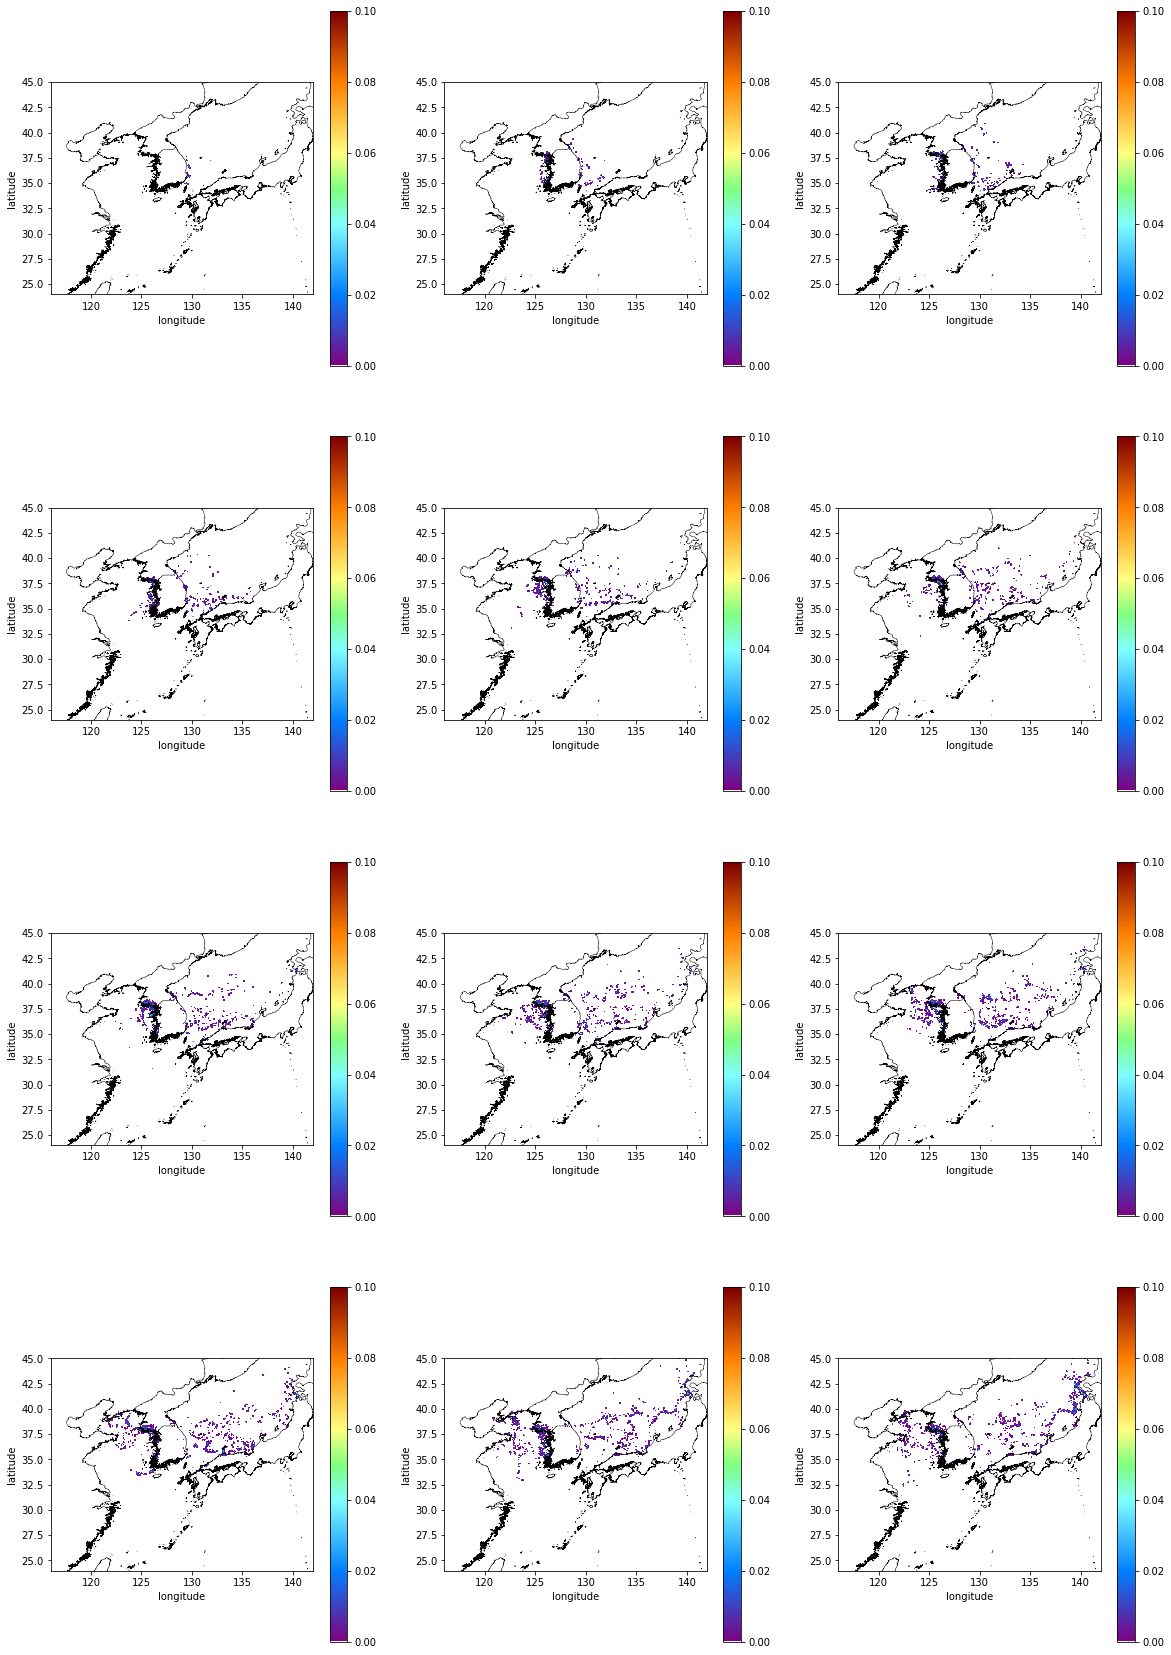

In [ ]:
### 매 월 첫번째 날짜일 때의 쓰레기 plot
# 로그 때리지 않고 했다
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

month_index = 'Dec 2017', 'Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018', 'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018'
fig_index = '(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '(m)', '(n)', '(o)', '(p)', '(q)', '(r)', '(s)', '(t)', '(u)', '(v)'
plot_extent = [min_lon, max_lon, min_lat, max_lat]
all_region = 's_korea', 'n_korea', 'japan', 'hubei', 'jiangsu', 'liaoning', 'shandong', 'zhejiang', 'taiwan', 'russia'

fig = plt.figure(figsize=(20,30))
for month in range(len(unique_time_by_month)):
  
  file_name = '/content/drive/MyDrive/plastic_transporting/plastic_table/s_korea' + unique_time_by_month[month] + '.csv'
  table = np.array(pd.read_csv(file_name)) 

  plt.subplot(4, 3, month+1)
  plt.imshow(preprocessing.normalize(table), cmap = hsl256_colorbar, extent = plot_extent)
  plt.plot(lonc, latc, color = 'k', linewidth = 0.5)
  # plt.contour(lon_meshgrid_after_interpolation, lat_meshgrid_after_interpolation[::-1], preprocessing.normalize(all_region_plastic_table))
  plt.ylim(min_lat, max_lat)
  plt.xlim(min_lon, max_lon) 
  plt.colorbar()
  plt.clim(0,0.1)
  plt.xlabel('longitude')
  plt.ylabel('latitude')
  plt.title(fig_index[month] + ' ' + month_index[month], loc = 'left', fontweight = 'bold')
plt.show()

In [ ]:
### 매 월 첫번째 날짜일 때의 쓰레기 plot
# 로그 때리지 않고 했다
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

month_index = 'Dec 2017', 'Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018', 'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018'
fig_index = '(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '(m)', '(n)', '(o)', '(p)', '(q)', '(r)', '(s)', '(t)', '(u)', '(v)'
plot_extent = [min_lon, max_lon, min_lat, max_lat]
all_region = 's_korea', 'n_korea', 'japan', 'hubei', 'jiangsu', 'liaoning', 'shandong', 'zhejiang', 'taiwan', 'russia'


fig = plt.figure(figsize=(20,40))
for month in range(1):
 
  file_name = '/content/drive/MyDrive/plastic_transporting/s_korea' + unique_time[month] + '.csv'
  table = np.array(pd.read_csv(file_name)) 


  plt.imshow(preprocessing.normalize(table), cmap = hsl256_colorbar, extent = plot_extent)
  plt.plot(lonc, latc, color = 'k', linewidth = 0.5)
 # plt.contour(lon_meshgrid_after_interpolation, lat_meshgrid_after_interpolation[::-1], preprocessing.normalize(all_region_plastic_table))
  plt.ylim(32.5, 39)
  plt.xlim(125, 132) 
  plt.colorbar()
  plt.clim(0,0.1)
  plt.xlabel('longitude')
  plt.ylabel('latitude')
  #plt.title(fig_index[month] + ' ' + month_index[month], loc = 'left', fontweight = 'bold')

In [ ]:
file_name0 = '/content/drive/MyDrive/plastic_transporting/s_korea' + unique_time[0] + '.csv'
table0 = np.array(pd.read_csv(file_name0))

file_name1 = '/content/drive/MyDrive/plastic_transporting/s_korea' + unique_time[1] + '.csv'
table1 = np.array(pd.read_csv(file_name1))

true = 0
false = 0
for ii in range(len(table0)):
  for jj in range(len(table0[0])):
    if table0[ii][jj] == table1[ii][jj]:
      true += 1
    elif table0[ii][jj] != table1[ii][jj]:
      false += 1

print(true)
print(false)


49153374
727


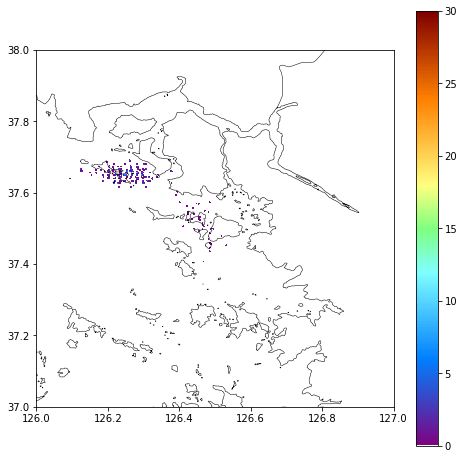

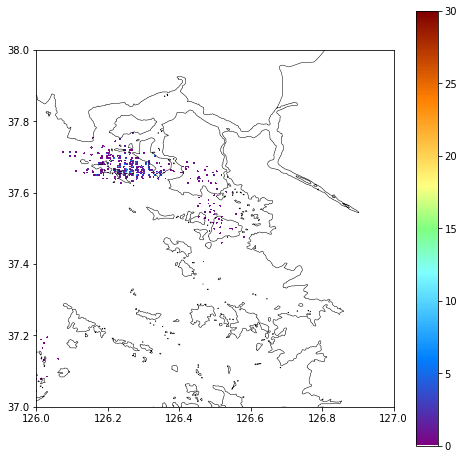

In [ ]:
min_river_lat = 37.5 - 0.5
max_river_lat = 37.5 + 0.5
min_river_lon = 126.5 - 0.5
max_river_lon = 126.5 + 0.5

min_river_lat_num = find_number_lat_dir(max_river_lat)
max_river_lat_num = find_number_lat_dir(min_river_lat)
min_river_lon_num = find_number_lon_dir(min_river_lon)
max_river_lon_num = find_number_lon_dir(max_river_lon)

river_table0 = []
river_table1 = []
for yl in range(max_river_lat_num - min_river_lat_num):
  river_table0.append(table0[yl + min_river_lat_num][min_river_lon_num : max_river_lon_num])
  river_table1.append(table1[yl + min_river_lat_num][min_river_lon_num : max_river_lon_num])
plot_extent = [min_river_lon, max_river_lon, min_river_lat, max_river_lat]

fig = plt.figure(figsize=(8,8))
plt.imshow(river_table0, cmap = hsl256_colorbar, extent = plot_extent)
plt.colorbar()
plt.plot(lonc, latc, color = 'k', linewidth = 0.5)
plt.xlim(min_river_lon, max_river_lon)
plt.ylim(min_river_lat, max_river_lat)
plt.clim(0, 30)
plt.show()

fig = plt.figure(figsize=(8,8))
plt.imshow(river_table1, cmap = hsl256_colorbar, extent = plot_extent)
plt.colorbar()
plt.plot(lonc, latc, color = 'k', linewidth = 0.5)
plt.xlim(min_river_lon, max_river_lon)
plt.ylim(min_river_lat, max_river_lat)
plt.clim(0, 30)
plt.show()